In [1]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from alive_progress import alive_bar

In [2]:
import os
import shutil


In [35]:
# RUN ONCE

if (os.exists("Fall")):
    os.rmdir("Fall")
    os.mkdir("Fall")
if (os.exists("Not Fall")):
    os.rmdir("Not Fall")
    os.mkdir("Not Fall")
with alive_bar(force_tty=True) as bar:
    for folder in os.listdir('sensor_data'):
        folder_path  = f'sensor_data/{folder}'
        for file in os.listdir(folder_path):
            file_path   = f'{folder_path}/{file}'
            with open(file_path, "rbU") as f:
                num_lines = sum(1 for _ in f)
            if(19<int(file[4:6])<35):
                if(num_lines<=1000):
                    shutil.copy(file_path,'Fall')
            else:
                if(num_lines<=1000):
                    shutil.copy(file_path,'Not Fall')
            bar()

            

|████████████████████████████████████████| 5075 in 1:10.2 (72.29/s) 


In [36]:
features = ['AccX','AccY','AccZ','GyrX','GyrY','GyrZ','EulerX','EulerY','EulerZ']

In [69]:
X,Y = [],[]

In [70]:
df = None
X,Y = [],[]
with alive_bar(force_tty=True) as bar: 
    for file in (os.listdir('Fall')):
        file_path = f'Fall/{file}'
        df = pd.read_csv(file_path,usecols=features)
        df = df.reindex(range(1000), fill_value=0)
        X.append(tf.convert_to_tensor(df))
        Y.append(1)
        bar()

# print(df.head())
# print(df.tail())

|████████████████████████████████████████| 2306 in 16.6s (139.14/s)             


In [71]:
df = None
with alive_bar(force_tty=True) as bar:
    for file in os.listdir('Not Fall'):
        file_path = f'Not Fall/{file}'
        df = pd.read_csv(file_path,usecols=features)
        df = df.reindex(range(1000), fill_value=0)
        X.append(tf.convert_to_tensor(df))
        Y.append(0)
        bar()

# print(df.head())
# print(df.tail())

|▶▶▶▶▶▶▶▶▶▶▶▶▶▶                          | ▁▃▅ 0 in 0s (0.0/s) 

|████████████████████████████████████████| 2253 in 19.9s (112.65/s)             


In [83]:
X_tensor = np.asarray(X)

In [84]:
Y_tensor = np.asarray(Y)


In [85]:
INPUT_DIM = 9
OUTPUT_DIM = 1
SEQUENCE_LEN = 1000
loss="binary_crossentropy"
optimizer="adam"
metrics=['accuracy']

In [86]:
y_tensor=Y_tensor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.20, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)


In [87]:
model = keras.Sequential()
model.add(layers.LSTM(64,input_dim=INPUT_DIM,input_length=SEQUENCE_LEN))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(OUTPUT_DIM,activation="sigmoid"))
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [88]:
model.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_val,y_val),verbose=True)

Epoch 1/10
228/228 [==============================] - 20s 69ms/step - loss: 0.6607 - accuracy: 0.5550 - val_loss: 0.4322 - val_accuracy: 0.8421
Epoch 2/10
228/228 [==============================] - 14s 63ms/step - loss: 0.4180 - accuracy: 0.8478 - val_loss: 0.4377 - val_accuracy: 0.8355
Epoch 3/10
228/228 [==============================] - 23s 101ms/step - loss: 0.4739 - accuracy: 0.8119 - val_loss: 0.5890 - val_accuracy: 0.6996
Epoch 4/10
228/228 [==============================] - 15s 67ms/step - loss: 0.5134 - accuracy: 0.7749 - val_loss: 0.5680 - val_accuracy: 0.7259
Epoch 5/10
228/228 [==============================] - 15s 66ms/step - loss: 0.4844 - accuracy: 0.7859 - val_loss: 0.4153 - val_accuracy: 0.8443
Epoch 6/10
228/228 [==============================] - 16s 68ms/step - loss: 0.3714 - accuracy: 0.8684 - val_loss: 0.2822 - val_accuracy: 0.9189
Epoch 7/10
228/228 [==============================] - 15s 66ms/step - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2908 - val_accuracy

In [82]:
print(len(X_train))

911


In [89]:
evaluation = model.evaluate(X_test,y_test,verbose=True,return_dict=True)
evaluation

15/15 [==============================] - 2s 94ms/step - loss: 0.3722 - accuracy: 0.8728


{'loss': 0.3722376525402069, 'accuracy': 0.8728070259094238}

In [97]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [93]:
model2 = keras.Sequential()
model2.add(layers.LSTM(128,input_dim=INPUT_DIM,input_length=SEQUENCE_LEN))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(32,activation="relu"))
model2.add(layers.Dense(16,activation="relu"))
model2.add(layers.Dense(OUTPUT_DIM,activation="sigmoid"))
model2.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [4]:
model2.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_val,y_val),verbose=True)


NameError: name 'model2' is not defined

In [1]:
# model2.save("model2")

NameError: name 'model2' is not defined

In [5]:
evaluation2 = model2.evaluate(X_test,y_test,verbose=True,return_dict=True)
evaluation2



NameError: name 'model2' is not defined

In [5]:
model2 = tf.keras.models.load_model("model2")

In [6]:
import math
import numpy as np

def Euler(yaw,pitch,roll):
    return roll,yaw,pitch
    return pitch*100,roll*100,yaw*100
    # ry = roll
    # rx = pitch
    # rz = yaw
    # yawMatrix = np.matrix([
    # [math.cos(yaw), -math.sin(yaw), 0],
    # [math.sin(yaw), math.cos(yaw), 0],
    # [0, 0, 1]
    # ])

    # pitchMatrix = np.matrix([
    # [math.cos(pitch), 0, math.sin(pitch)],
    # [0, 1, 0],
    # [-math.sin(pitch), 0, math.cos(pitch)]
    # ])

    # rollMatrix = np.matrix([
    # [1, 0, 0],
    # [0, math.cos(roll), -math.sin(roll)],
    # [0, math.sin(roll), math.cos(roll)]
    # ])

    # R = yawMatrix * pitchMatrix * rollMatrix

    # theta = math.acos(((R[0, 0] + R[1, 1] + R[2, 2]) - 1) / 2)
    # multi = 1 / (2 * math.sin(theta))

    # rx = multi * (R[2, 1] - R[1, 2]) * theta
    # ry = multi * (R[0, 2] - R[2, 0]) * theta
    # rz = multi * (R[1, 0] - R[0, 1]) * theta

    return rx*57.2958*10, ry*57.2958*10, rz*57.2958*10
# 


In [7]:
from scipy.ndimage.filters import uniform_filter1d

C:\Users\prach\AppData\Local\Temp\ipykernel_1840\3631965227.py:1: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [59]:
result = pd.read_csv('result.csv')
result['EulerX'] = 0
result['EulerY'] = 0
result['EulerZ'] = 0
print(len(result))

result['Acc_X'] = result['Acc_X']/-9.8
result['Acc_Y'] = result['Acc_Y']/-9.8
result['Acc_Z'] = result['Acc_Z']/-9.8
result['Acc_X'],result['Acc_Z'] = result['Acc_Z'],result['Acc_X']
result['Acc_X']=result['Acc_X']*0.2 
result['Acc_Y']=-1*(result['Acc_Y']-0.5)*0.5

# result['Gyro_X'] = result['Gyro_X']/9.8
# result['Gyro_Y'] = result['Gyro_Y']/9.8
# result['Gyro_Z'] = result['Gyro_Z']/9.8
result['Gyro_X'],result['Gyro_Z'] = result['Gyro_Z'],result['Acc_X'] 
for i in range(len(result)):
    result.loc[i,['EulerX','EulerY','EulerZ']] = (Euler(*result.loc[i,['Roll','Pitch','Yaw']]))




5878


In [60]:
test = result.drop(columns=['Timestamp','Roll','Yaw','Pitch'])
for col in range(9):
    test.iloc[:,col] = uniform_filter1d(test.iloc[:,col],size=20)
    
test.head()




,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,EulerX,EulerY,EulerZ
0,-0.172837,0.496259,-0.081142,-0.039934,-0.012660,-0.172837,30.257919,-5.364785,-29.574389
1,-0.172813,0.496253,-0.081032,-0.039743,-0.012690,-0.172813,30.256459,-5.358366,-29.577414
2,-0.172744,0.496253,-0.080804,-0.039361,-0.012935,-0.172744,30.279451,-5.345516,-29.587507
3,-0.172661,0.496284,-0.080675,-0.038850,-0.013668,-0.172661,30.319204,-5.339654,-29.602462
4,-0.172590,0.496307,-0.080730,-0.038155,-0.014363,-0.172590,30.333772,-5.345455,-29.614532


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
truth = pd.read_csv('Not Fall/S06T02R01.csv')
truth.drop(columns=['TimeStamp(s)','FrameCounter'],inplace=True)
truth.reindex(range(1000), fill_value=0)

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,-0.059,-1.007,-0.050,-3.609635,-7.161975,0.859437,87.926135,-3.093973,-53.124666
1,-0.051,-1.002,-0.060,-5.385805,-4.640960,0.859437,87.874568,-3.099703,-53.170502
2,-0.058,-0.999,-0.066,-5.500397,-4.812847,0.916733,87.823002,-3.111162,-53.222069
3,-0.062,-0.999,-0.070,-5.500397,-4.354481,0.974029,87.771436,-3.122621,-53.262176
4,-0.061,-0.999,-0.076,-5.443101,-3.838819,1.145916,87.685492,-3.139810,-53.290824
...,...,...,...,...,...,...,...,...,...
995,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1/1 [==============================] - 0s 131ms/step


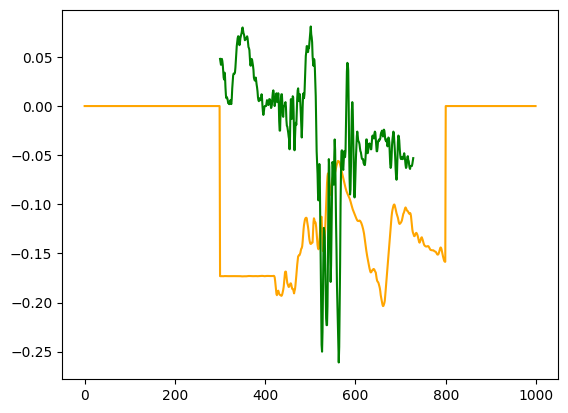

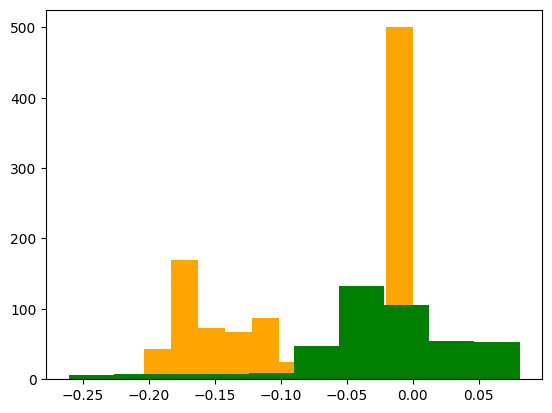

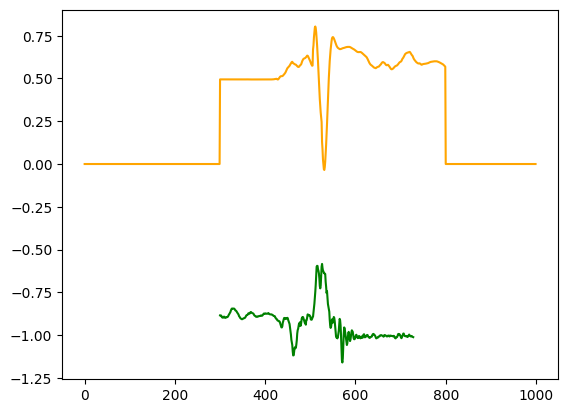

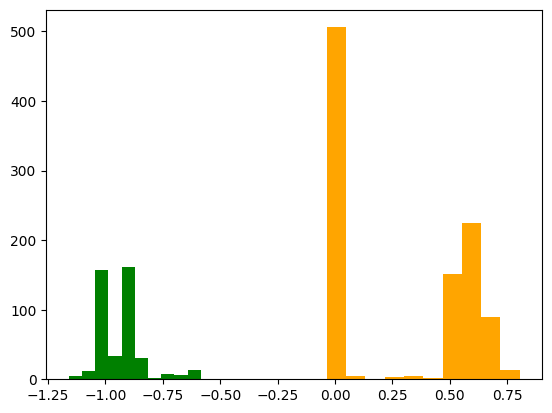

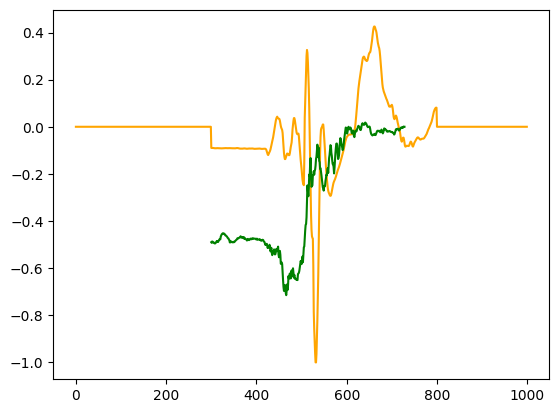

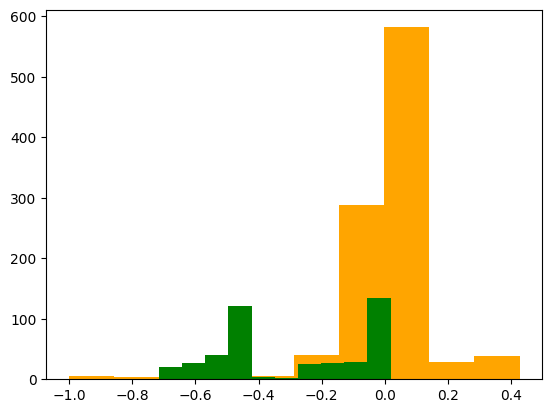

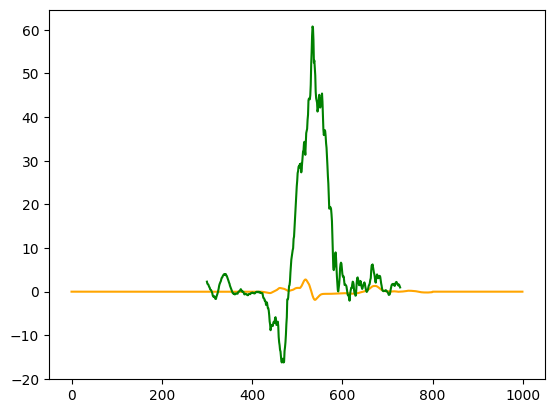

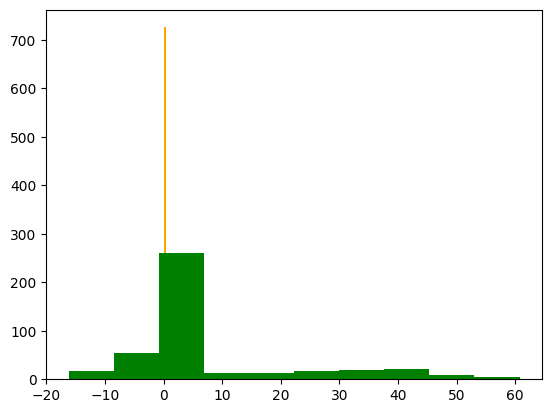

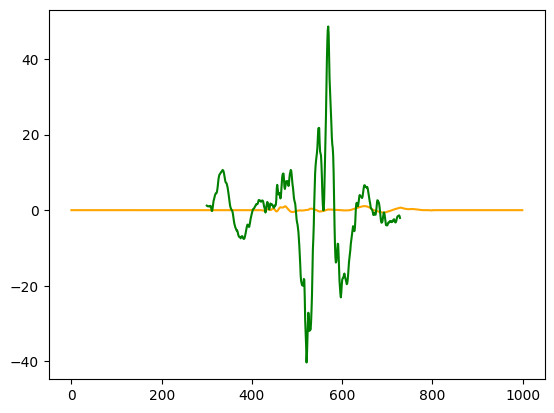

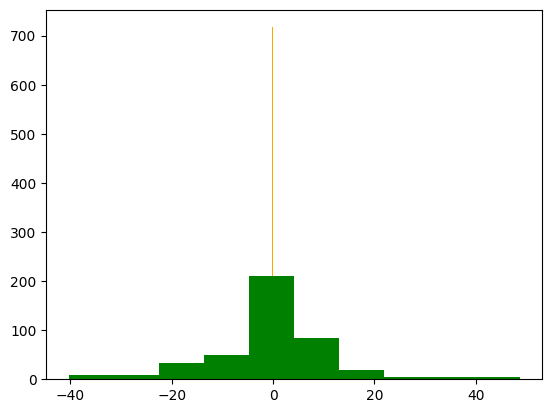

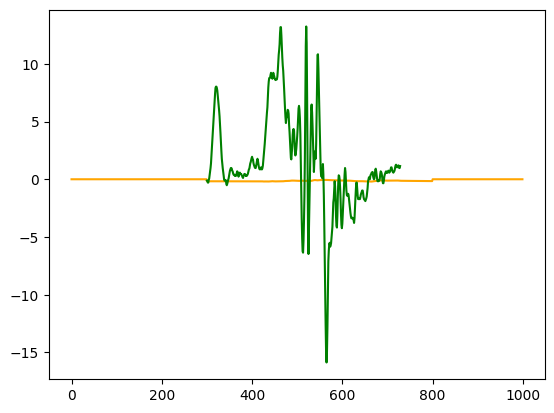

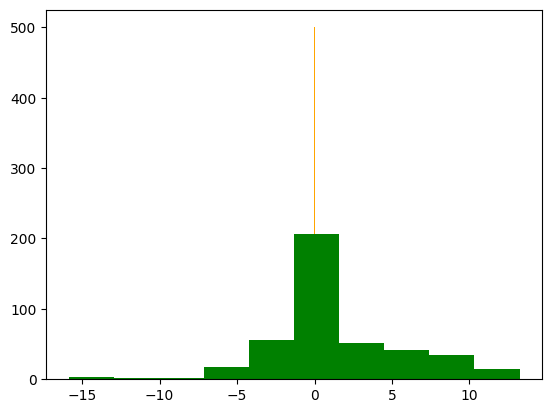

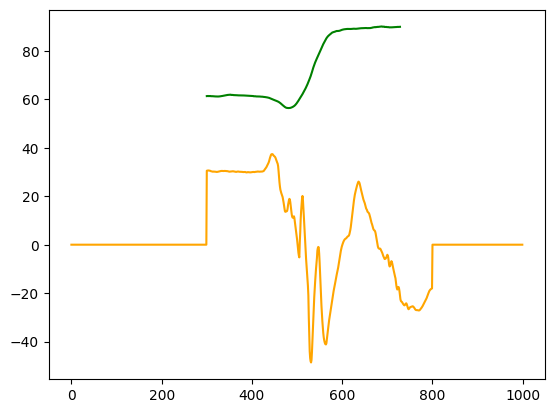

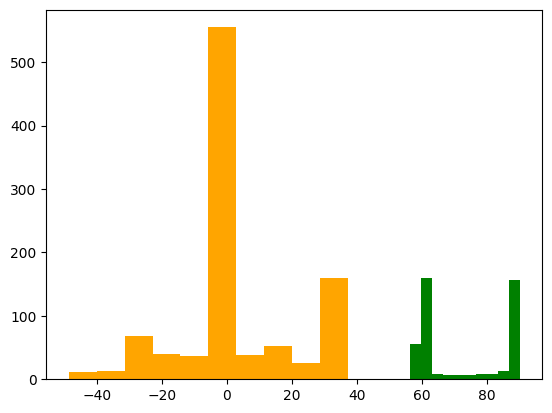

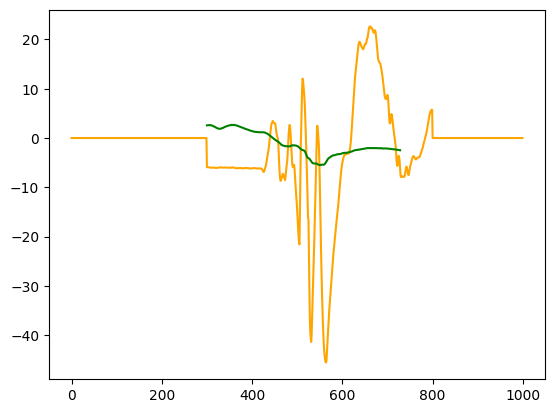

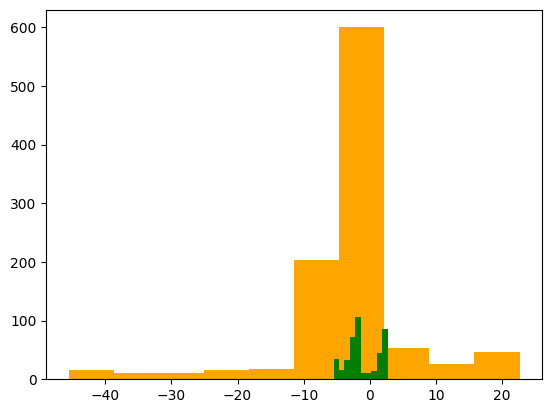

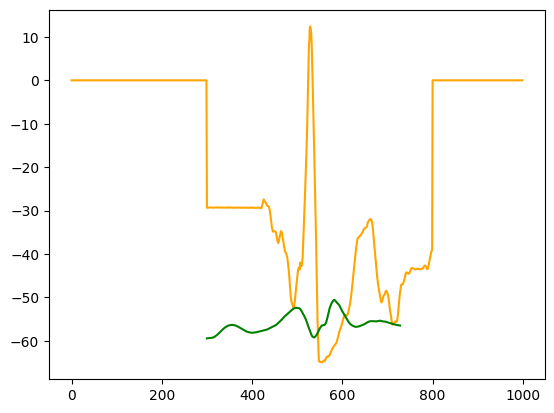

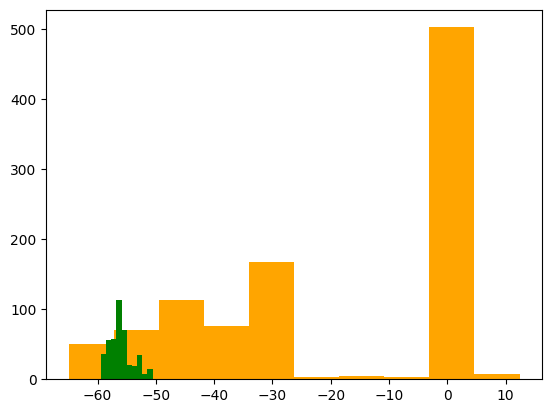

In [63]:
predictions = []
for i in range(300,len(test)-300):
    x = test[i:i+500].reindex(range(1000), fill_value=0)
    test_tensor = tf.convert_to_tensor(x)
    predictions.append(model2.predict(np.asarray([test_tensor])))
    for col in range(9):
        plt.figure()
        plt.plot(x.iloc[:,col],color='orange')
        plt.plot(truth.iloc[i:i+500,col],color='green')
        plt.figure()
        plt.hist(x.iloc[:,col],color='orange')
        plt.hist(truth.iloc[i:i+500,col],color='green')
    break

In [82]:
predictions

[array([[0.9532449]], dtype=float32)]